<!-- # CNN autoencoder and Clustering from MTRX data

Use this notebook to load Scienta Omicron Matrix format SPM data and create standardised images for machine learning training and analysis. The code can generate both JPG image data, useful for manually checking the data, and windowed numpy data that can be loaded into ML models. 

The notebook then creates an autoencoder for training on a large dataset, followed by KMEANS clustering. 

**Author**: Steven R. Schofield  
**Created**: November, 2024 -->

# CASTEP - Si lattice parameter optimisations
## Steven R. Schofield (Universtiy College London) May 2025

### Load required modules

In [1]:
import sys
from pathlib import Path

# Define candidate paths using Path objects
module_path_list = [
    Path('/Users/steven/academic-iCloud/Python/modules'),
    Path('/hpc/srs/Python/modules')
]

data_path_list = [
    Path('/Users/steven/academic-iCloud/Calculations/castep/'),
    Path('/hpc/srs/Python-data')
]

# Resolve actual paths
module_path = next((p for p in module_path_list if p.exists()), None)
data_path = next((p for p in data_path_list if p.exists()), None)

# Check and report missing paths
if module_path is None:
    print("Error: Could not locate a valid module path.")
if data_path is None:
    print("Error: Could not locate a valid data path.")

if module_path is None or data_path is None:
    sys.exit(1)

# Add module_path to sys.path if needed
if str(module_path) not in sys.path:
    sys.path.insert(0, str(module_path))

# Print resolved paths
print(f"module_path = {module_path}")
print(f"data_path = {data_path}")

module_path = /Users/steven/academic-iCloud/Python/modules
data_path = /Users/steven/academic-iCloud/Calculations/castep


In [3]:
# # Ensure modules are reloaded 
%load_ext autoreload
%autoreload 2

# Import standard modules
import numpy as np
import pandas as pd
import os

# Import custom module
import SRSCALCUTILS.castep_tools as ct

from IPython.display import display, Image as StaticImage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Job paths

In [4]:
# Parameters for windows creation
# General
job_folder = 'work-2025/si_lattice_001'
job_path = data_path / job_folder
verbose = False             # Set this True to print out more information

# Print resolved paths
print(f"job_path = {job_path}")

job_path = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001


### Create CASTEP input files

In [5]:
params = {'task' : 'geomopt',
          'xc_functional'           : 'PBE',
#          'basis_precision'         : 'precise',         #coarse | medium | fine | precise OR 'cut_off_energy' : 750,
          'cut_off_energy'          : 700,
          'spin_polarised'          : 'false',
          'write_cell_structure'    : 'true',
          'charge'                  : 0,
          'nextra_bands'            : 6,
          'geom_energy_tol'         : 0.00005,          # default: 0.00005 eV 
          'geom_disp_tol'           : 0.002,            # default: 0.002 Ang.
          'geom_max_iter'           : 100,              # default: 30
          'geom_convergence_win'    : 2,                # default: 2
          'max_scf_cycles'          : 300               # default: 30
          }              

In [6]:
# 

filename = "silicon"
title = "silicon lattice parameter optimisation"

na=1
nb=1
nc=1

lattice_cart = np.array([
            [3.8,     0.0,     0.0],
            [0.0,     3.8,     0.0],
            [0.0,     0.0,     5.4,]
        ])

positions_frac = np.array([
            ['Si', 0.0,  0.0,  0.0],
            ['Si', 0.5,  0.0,  0.25],
            ['Si', 0.5,  0.5,  0.5],
            ['Si', 0.0,  0.5,  0.75],
        ])

constraints = np.array([
            [1,  1,  2],
            [0,  0,  0]
        ])

kpoints_mp_grid = np.array([8, 8, 8])

fix_all_ions = True
symmetry_generate=False
symmetry_tol = 0.01

In [7]:
# If it doesn’t exist, create it (including any missing parent folders)
if not os.path.isdir(job_path):
    os.makedirs(job_path, exist_ok=True)

# Now safely switch into it
os.chdir(job_path)

print("Now in:", os.getcwd())
print("Files:", os.listdir())

Now in: /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/academic/Calculations/castep/work-2025/si_lattice_001
Files: ['silicon-800.cst_esp', 'silicon-200.check', 'silicon-500.param', 'silicon-700.castep', 'silicon-600.castep', 'silicon-200-out.cell', 'silicon-nextra-8.castep_bin', 'silicon-700.geom', 'silicon-nextra-10.geom', 'silicon-nextra-4.check', 'silicon-nextra-10.castep_bin', 'silicon-nextra-12.bib', 'silicon-900.bib', 'silicon-nextra-6.bib', 'silicon-nextra-6.check', 'silicon-500.cst_esp', 'silicon-nextra-6.castep', 'silicon-700.cell', 'silicon-nextra-4.bib', 'silicon-nextra-10.bib', 'silicon-nextra-0-out.cell', 'silicon-500.bands', 'silicon-800.castep_bin', 'silicon-nextra-8.cst_esp', 'silicon-nextra-10.cell', 'silicon-nextra-2.cell', 'silicon-nextra-8.castep', 'silicon-900.cell', 'silicon-400.bands', 'silicon-nextra-0.castep_bin', 'silicon-nextra-4.castep', 'silicon-500.cell', 'silicon-nextra-2.check', 'silicon-1000.cell', 'silicon-nextra-14.bib', 'silicon-nextra-0

### Convergence with cut off energy

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-200.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-200.cell

To err is human,
To purr feline.
		-- Robert Byrne


                                         FILE: silicon-200.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-200.castep   

No warnings found in: silicon-200.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-200.castep


,Parameter,Value
0,plane wave basis set cut-off,200.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


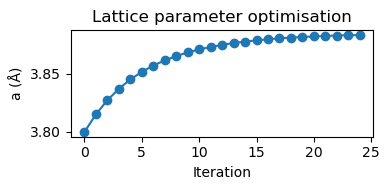

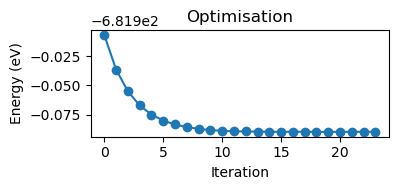

Final unit cell
	 [3.8833923, -0.0, -0.0]
	 [-0.0, 3.8833923, -0.0]
	 [-0.0, -0.0, 5.5029071]
Final a = 3.8834 b = 3.8834 c = 5.5029 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-300.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-300.cell

Hand me a pair of leather pants and a CASIO keyboard -- I'm living for today!


                                         FILE: silicon-300.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-300.castep   

No warnings found in: silicon-300.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-300.castep


,Parameter,Value
0,plane wave basis set cut-off,300.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


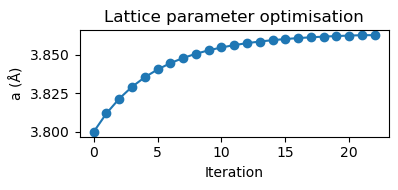

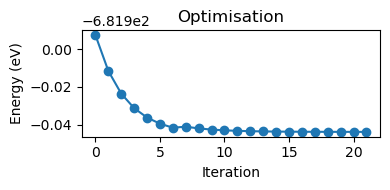

Final unit cell
	 [3.8628244, 0.0, 0.0]
	 [0.0, 3.8628244, 0.0]
	 [0.0, 0.0, 5.4766712]
Final a = 3.8628 b = 3.8628 c = 5.4767 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-400.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-400.cell

You know my heart keeps tellin' me,
You're not a kid at thirty-three,
You play around you lose your wife,
You play too long, you lose your life.
Some gotta win, some gotta lose,
Goodtime Charlie's got the blues.


                                         FILE: silicon-400.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-400.castep   

No warnings found in: silicon-400.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-400.castep


,Parameter,Value
0,plane wave basis set cut-off,400.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


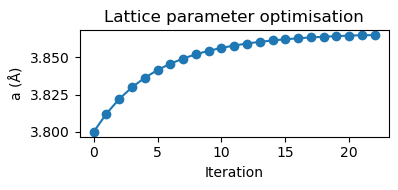

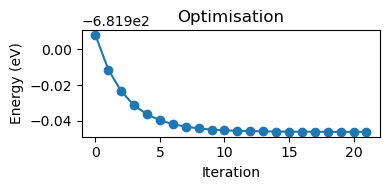

Final unit cell
	 [3.8646864, 0.0, 0.0]
	 [0.0, 3.8646864, 0.0]
	 [0.0, 0.0, 5.4734727]
Final a = 3.8647 b = 3.8647 c = 5.4735 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-500.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-500.cell

The covers of this book are too far apart.
		-- Book review by Ambrose Bierce.


                                         FILE: silicon-500.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-500.castep   

No warnings found in: silicon-500.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-500.castep


,Parameter,Value
0,plane wave basis set cut-off,500.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


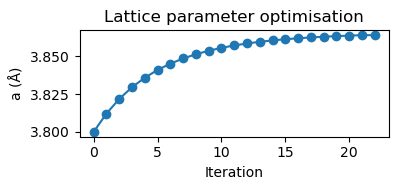

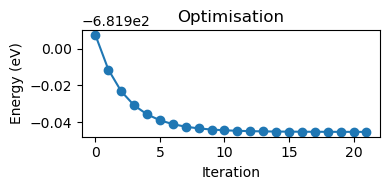

Final unit cell
	 [3.8641337, -0.0, 0.0]
	 [-0.0, 3.8641337, 0.0]
	 [0.0, 0.0, 5.4715921]
Final a = 3.8641 b = 3.8641 c = 5.4716 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-600.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-600.cell

Marriage causes dating problems.


                                         FILE: silicon-600.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-600.castep   

No warnings found in: silicon-600.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-600.castep


,Parameter,Value
0,plane wave basis set cut-off,600.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


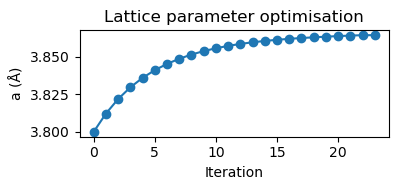

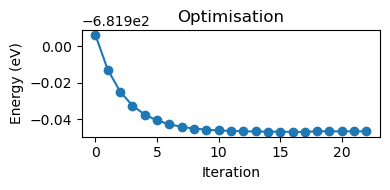

Final unit cell
	 [3.8641514, 0.0, -0.0]
	 [0.0, 3.8641514, 0.0]
	 [-0.0, 0.0, 5.4736606]
Final a = 3.8642 b = 3.8642 c = 5.4737 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-700.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-700.cell

%DCL-MEM-BAD, bad memory
VMS-F-PDGERS, pudding between the ears


                                         FILE: silicon-700.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-700.castep   

No warnings found in: silicon-700.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-700.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


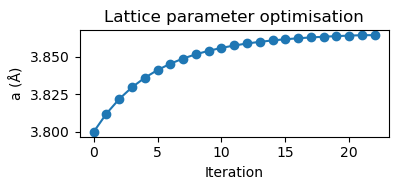

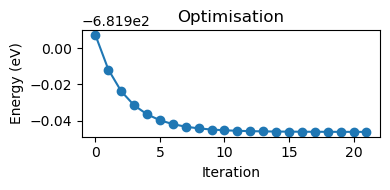

Final unit cell
	 [3.864279, -0.0, 0.0]
	 [-0.0, 3.864279, 0.0]
	 [0.0, 0.0, 5.4725969]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-800.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-800.cell

Finality is death.
Perfection is finality.
Nothing is perfect.
There are lumps in it.


                                         FILE: silicon-800.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-800.castep   

No warnings found in: silicon-800.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-800.castep


,Parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


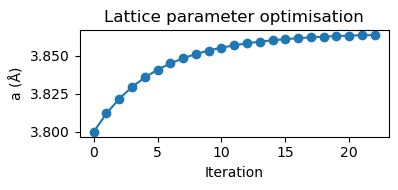

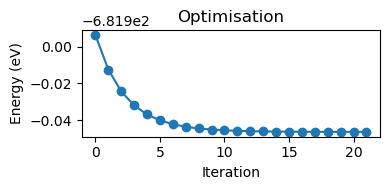

Final unit cell
	 [3.8634566, 0.0, 0.0]
	 [0.0, 3.8634566, 0.0]
	 [0.0, 0.0, 5.47337]
Final a = 3.8635 b = 3.8635 c = 5.4734 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-900.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-900.cell

"Problem solving under linux has never been the circus that it is under
AIX."
(By Pete Ehlke in comp.unix.aix)


                                         FILE: silicon-900.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-900.castep   

No warnings found in: silicon-900.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-900.castep


,Parameter,Value
0,plane wave basis set cut-off,900.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


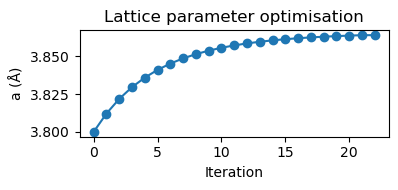

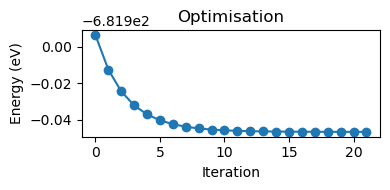

Final unit cell
	 [3.8639405, 0.0, -0.0]
	 [0.0, 3.8639405, -0.0]
	 [-0.0, -0.0, 5.472957]
Final a = 3.8639 b = 3.8639 c = 5.4730 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-1000.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-1000.cell

The trouble with a lot of self-made men is that they worship their creator.


                                        FILE: silicon-1000.castep                                         
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-1000.castep   

No warnings found in: silicon-1000.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-1000.castep


,Parameter,Value
0,plane wave basis set cut-off,1000.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


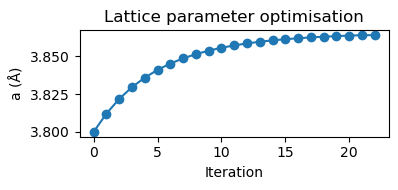

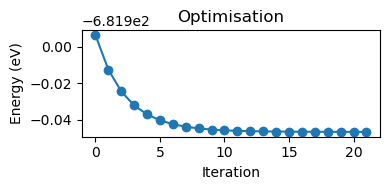

Final unit cell
	 [3.8639622, 0.0, -0.0]
	 [0.0, 3.8639622, 0.0]
	 [-0.0, 0.0, 5.4728708]
Final a = 3.8640 b = 3.8640 c = 5.4729 alpha = 90.0000 beta = 90.0000 gamma = 90.0000



In [7]:
var_list = [200,300,400,500,600,700,800,900,1000]
alist = []
energy_list = []

for var in var_list:
    params['cut_off_energy'] = var
    filename = f"silicon-{var}"
    _ = ct.write_param_file(
        params,
        title = title,
        filename=filename,
        path=job_path,
        display_file=False
        )
    _ = ct.write_cell_file(
        title = title,
        path=job_path,
        filename=filename,
        na=na,
        nb=nb,
        nc=nc,
        lattice_cart=lattice_cart,
        positions_frac=positions_frac,
        constraints=constraints,
        fix_all_ions=True,
        symmetry_generate=symmetry_generate,
        symmetry_tol = symmetry_tol,
        kpoints_mp_grid=kpoints_mp_grid,
        display_file=False
    )

    !zsh -l -c "castepmpi {filename}"

    castep_path = job_path / f"{filename}.castep"

    warnings = ct.get_warnings(castep_path, verbose=True)

    calculation_parameters = ct.get_calculation_parameters(castep_path)
    calculation_parameters_df = pd.DataFrame(list(calculation_parameters.items()), columns=['Parameter', 'Value'])

    lattice_optimisation = ct.get_lattice_parameters(castep_path)
    a_values = [blk['a'] for blk in lattice_optimisation]

    unit_cell, a, b, c, alpha, beta, gamma = ct.get_final_lattice_parameters(castep_path)

    energy_optimisation = ct.get_LBFGS_energies(castep_path)
    energies = [val for _, val in energy_optimisation]

    ct.print_filename(castep_path)
    print(warnings)
    display(calculation_parameters_df)

    ct.plot_sequence(a_values, xlabel='Iteration', ylabel='a (Å)', title='Lattice parameter optimisation')
    ct.plot_sequence(energies, xlabel='Iteration', ylabel='Energy (eV)', title='Optimisation')

    print(f"Final unit cell")
    for vector in unit_cell:
        print(f"\t {vector}")
    print(f"Final a = {a:.4f} b = {b:.4f} c = {c:.4f} alpha = {alpha:.4f} beta = {beta:.4f} gamma = {gamma:.4f}\n")

    alist.append(a)
    energy_list.append(energies[-1])


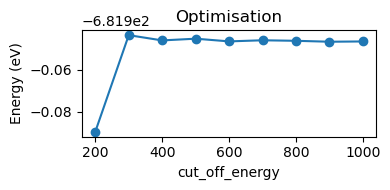

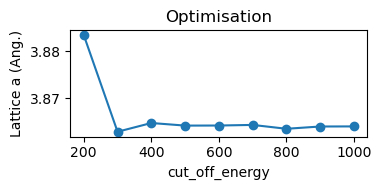

,Cut off energy (eV),Lattice constant (Å),Energy
0,200,3.883392,-681.989382
1,300,3.862824,-681.943675
2,400,3.864686,-681.946160
3,500,3.864134,-681.945343
4,600,3.864151,-681.946622
5,700,3.864279,-681.946094
6,800,3.863457,-681.946346
7,900,3.863941,-681.946780
8,1000,3.863962,-681.946650


In [8]:

ct.plot_sequence(energy_list, var_list, xlabel='cut_off_energy', ylabel='Energy (eV)', title='Optimisation')
ct.plot_sequence(alist, var_list, xlabel='cut_off_energy', ylabel='Lattice a (Ang.)', title='Optimisation')

import pandas as pd

df = pd.DataFrame({
    "Cut off energy (eV)": var_list,
    "Lattice constant (Å)": alist,
    "Energy": energy_list,
})

display( df)

### Convergence with nextrabands

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-0.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-0.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-0.castep

There are a lot of lies going around.... and half of them are true.
		-- Winston Churchill


                                        FILE: silicon-nextra-0.castep                                         
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-0.castep   


===== WARNINGS in: silicon-nextra-0.castep =====
      full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-0.castep

 Warning in parameters_read: it appears you may not have specified enough 
                           - extra bands so you may have trouble with metals
               

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,8.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


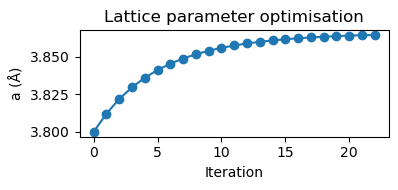

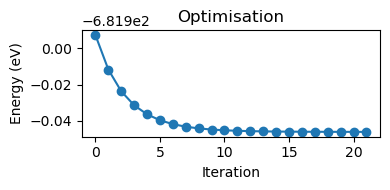

Final unit cell
	 [3.8642767, -0.0, 0.0]
	 [-0.0, 3.8642767, 0.0]
	 [0.0, 0.0, 5.4725926]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-2.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-2.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-2.castep

I never said all Democrats were saloonkeepers; what I said was all
saloonkeepers were Democrats.


                                        FILE: silicon-nextra-2.castep                                         
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-2.castep   


===== WARNINGS in: silicon-nextra-2.castep =====
      full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-n

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


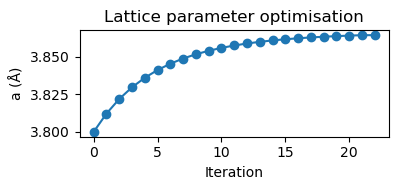

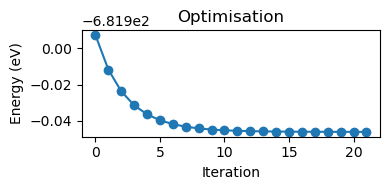

Final unit cell
	 [3.8642747, 0.0, 0.0]
	 [0.0, 3.8642747, -0.0]
	 [0.0, 0.0, 5.4725969]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-4.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-4.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-4.castep

Each new user of a new system uncovers a new class of bugs.
		-- Kernighan


                                        FILE: silicon-nextra-4.castep                                         
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-4.castep   


===== WARNINGS in: silicon-nextra-4.castep =====
      full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-4.castep

       

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,12.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


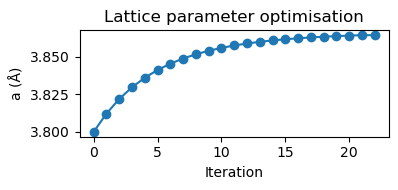

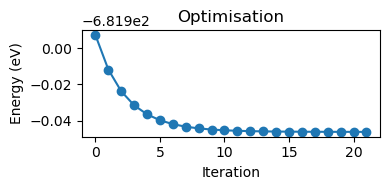

Final unit cell
	 [3.8642777, 0.0, 0.0]
	 [0.0, 3.8642777, -0.0]
	 [0.0, -0.0, 5.4725957]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-6.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-6.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-6.castep

FORTUNE DISCUSSES THE DIFFERENCES BETWEEN MEN AND WOMEN:	#5

Trust:
	The average woman would really like to be told if her mate is fooling
around behind her back.  This same woman wouldn't tell her best friend if
she knew the best friends' mate was having an affair.  She'll tell all her
OTHER friends, however.  The average man won't say anything if he knows that
one of his friend's mates is fooling around, and he'd rather not know if
his mate is having an affair either

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


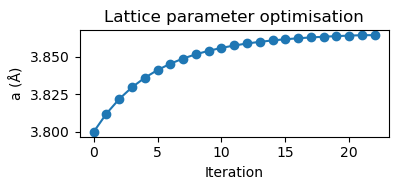

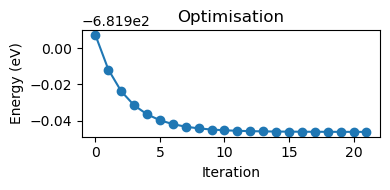

Final unit cell
	 [3.864279, -0.0, -0.0]
	 [-0.0, 3.864279, 0.0]
	 [-0.0, 0.0, 5.4725969]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-8.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-8.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-8.castep

He who steps on others to reach the top has good balance.


                                        FILE: silicon-nextra-8.castep                                         
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-8.castep   

No warnings found in: silicon-nextra-8.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-8.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,16.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


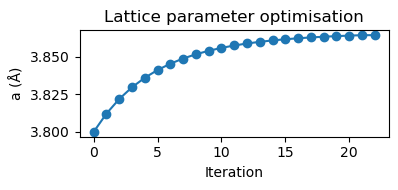

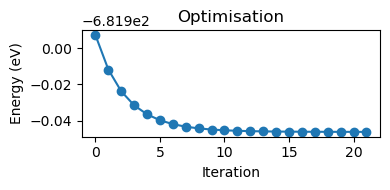

Final unit cell
	 [3.8642802, -0.0, 0.0]
	 [-0.0, 3.8642802, -0.0]
	 [0.0, -0.0, 5.4725973]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-10.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-10.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-10.castep

Here there be tygers.


                                         FILE: silicon-nextra-10.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-10.castep   

No warnings found in: silicon-nextra-10.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-10.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,18.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


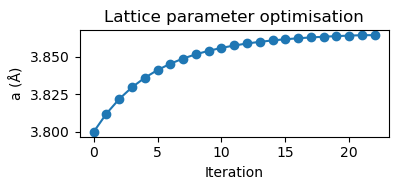

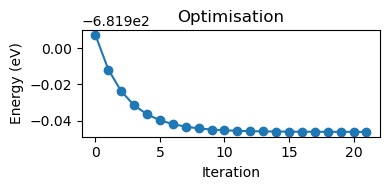

Final unit cell
	 [3.8642811, -0.0, 0.0]
	 [-0.0, 3.8642811, -0.0]
	 [0.0, -0.0, 5.4725984]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-12.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-12.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-12.castep

If the American dream is for Americans only, it will remain our dream
and never be our destiny.
		-- Rene de Visme Williamson


                                         FILE: silicon-nextra-12.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-12.castep   

No warnings found in: silicon-nextra-12.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,20.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


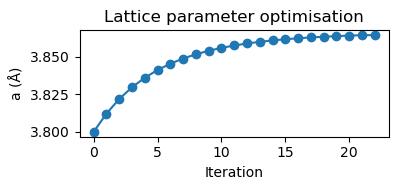

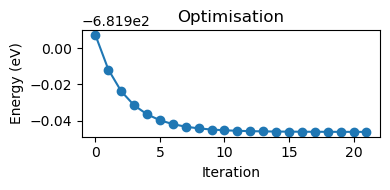

Final unit cell
	 [3.8642822, -0.0, 0.0]
	 [-0.0, 3.8642822, 0.0]
	 [0.0, 0.0, 5.4725997]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-14.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-14.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-nextra-14.castep

	The Priest's grey nimbus in a niche where he dressed discreetly.
I will not sleep here tonight. Home also I cannot go.
	A voice, sweetened and sustained, called to him from the sea.
Turning the curve he waved his hand.  A sleek brown head, a seal's, far
out on the water, round.  Usurper.
		-- James Joyce, "Ulysses"


                                         FILE: silicon-nextra-14.castep                                        
   PATH: /Users/steven/academic-iCloud

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,22.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


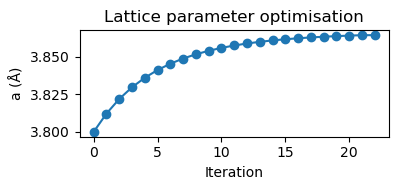

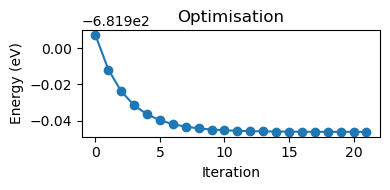

Final unit cell
	 [3.8642831, -0.0, -0.0]
	 [-0.0, 3.8642831, 0.0]
	 [-0.0, 0.0, 5.4726007]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000



In [11]:
var_list = [0,2,4,6,8,10,12,14]
alist = []
energy_list = []
params['cut_off_energy'] = 700

for var in var_list:
    params['nextra_bands'] = var
    filename = f"silicon-nextra-{var}"
    _ = ct.write_param_file(
        params,
        title = title,
        filename=filename,
        path=job_path,
        display_file=False
        )
    _ = ct.write_cell_file(
        title = title,
        path=job_path,
        filename=filename,
        na=na,
        nb=nb,
        nc=nc,
        lattice_cart=lattice_cart,
        positions_frac=positions_frac,
        constraints=constraints,
        fix_all_ions=True,
        symmetry_generate=symmetry_generate,
        symmetry_tol = symmetry_tol,
        kpoints_mp_grid=kpoints_mp_grid,
        display_file=False
    )

    castep_file = job_path / f"{filename}.castep"
    print(f"castep_file = {castep_file}")

    !zsh -l -c "castepmpi {filename}"

    castep_path = job_path / f"{filename}.castep"

    warnings = ct.get_warnings(castep_path, verbose=True)

    calculation_parameters = ct.get_calculation_parameters(castep_path)
    calculation_parameters_df = pd.DataFrame(list(calculation_parameters.items()), columns=['Parameter', 'Value'])

    lattice_optimisation = ct.get_lattice_parameters(castep_path)
    a_values = [blk['a'] for blk in lattice_optimisation]

    unit_cell, a, b, c, alpha, beta, gamma = ct.get_final_lattice_parameters(castep_path)

    energy_optimisation = ct.get_LBFGS_energies(castep_path)
    energies = [val for _, val in energy_optimisation]

    ct.print_filename(castep_path)
    print(warnings)
    display(calculation_parameters_df)

    ct.plot_sequence(a_values, xlabel='Iteration', ylabel='a (Å)', title='Lattice parameter optimisation')
    ct.plot_sequence(energies, xlabel='Iteration', ylabel='Energy (eV)', title='Optimisation')

    print(f"Final unit cell")
    for vector in unit_cell:
        print(f"\t {vector}")
    print(f"Final a = {a:.4f} b = {b:.4f} c = {c:.4f} alpha = {alpha:.4f} beta = {beta:.4f} gamma = {gamma:.4f}\n")

    alist.append(a)
    energy_list.append(energies[-1])


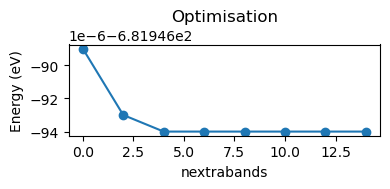

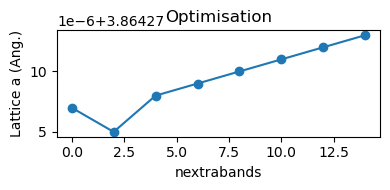

,nextrabands,Lattice constant (Å),Energy
0,0,3.864277,-681.946089
1,2,3.864275,-681.946093
2,4,3.864278,-681.946094
3,6,3.864279,-681.946094
4,8,3.864280,-681.946094
5,10,3.864281,-681.946094
6,12,3.864282,-681.946094
7,14,3.864283,-681.946094


In [12]:
ct.plot_sequence(energy_list, var_list, xlabel='nextrabands', ylabel='Energy (eV)', title='Optimisation')
ct.plot_sequence(alist, var_list, xlabel='nextrabands', ylabel='Lattice a (Ang.)', title='Optimisation')

import pandas as pd

df = pd.DataFrame({
    "nextrabands": var_list,
    "Lattice constant (Å)": alist,
    "Energy": energy_list,
})

display( df)

### Convergence with kpoints

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-1.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-1.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-1.castep

Confession is good for the soul only in the sense that a tweed coat is
good for dandruff.
		-- Peter de Vries


                                         FILE: silicon-kpoints-1.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-1.castep   


===== WARNINGS in: silicon-kpoints-1.castep =====
      full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-1.castep

 WARNING in geom_xvec_to_mdl - large cell change detected
                             - consider your initial cell
-------------------------

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


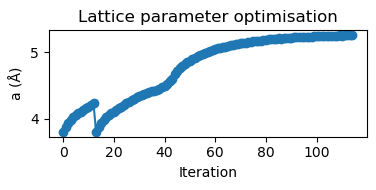

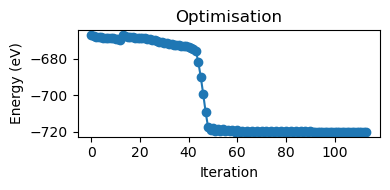

Final unit cell
	 [5.261706, -0.0, -0.0]
	 [-0.0, 5.261706, 0.0]
	 [0.0, -0.0, 1.7270285]
Final a = 5.2617 b = 5.2617 c = 1.7270 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-2.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-2.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-2.castep

Sigmund Freud is alleged to have said that in the last analysis the entire field
of psychology may reduce to biological electrochemistry.


                                         FILE: silicon-kpoints-2.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-2.castep   

No warnings found in: silicon-kpoints-2.castep
  full path: /Users/steven/academic-iCloud/Calculations/ca

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


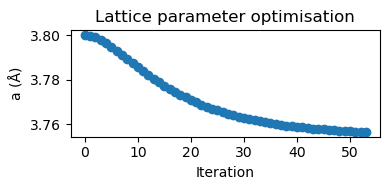

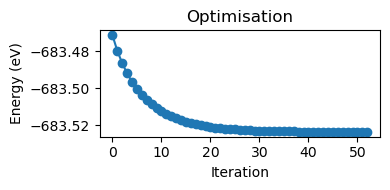

Final unit cell
	 [3.7565371, 0.0, -0.0]
	 [0.0, 3.7565371, 0.0]
	 [0.0, -0.0, 5.6145589]
Final a = 3.7565 b = 3.7565 c = 5.6146 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-3.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-3.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-3.castep

"An anthropologist at Tulane has just come back from a field trip to New 
Guinea with reports of a tribe so primitive that they have Tide but not 
new Tide with lemon-fresh Borax."
-- David Letterman


                                         FILE: silicon-kpoints-3.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-3.castep   

No warnings found in: silicon-kpoints-3.cas

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


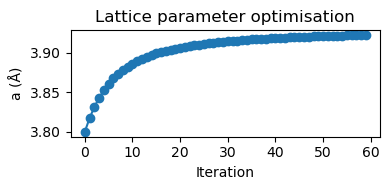

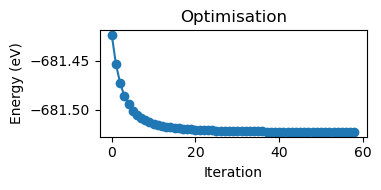

Final unit cell
	 [3.9224628, 0.0, 0.0]
	 [0.0, 3.9224628, -0.0]
	 [-0.0, 0.0, 5.3472495]
Final a = 3.9225 b = 3.9225 c = 5.3472 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-4.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-4.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-4.castep

Truth is free, but information costs.


                                         FILE: silicon-kpoints-4.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-4.castep   

No warnings found in: silicon-kpoints-4.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-4.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


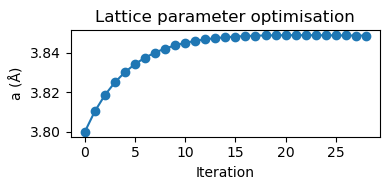

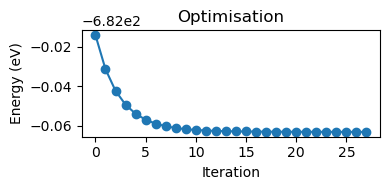

Final unit cell
	 [3.8487914, 0.0, 0.0]
	 [0.0, 3.8487914, -0.0]
	 [0.0, -0.0, 5.5061505]
Final a = 3.8488 b = 3.8488 c = 5.5061 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-5.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-5.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-5.castep

"Thank heaven for startups; without them we'd never have any advances."
-- Seymour Cray


                                         FILE: silicon-kpoints-5.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-5.castep   

No warnings found in: silicon-kpoints-5.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-5.ca

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


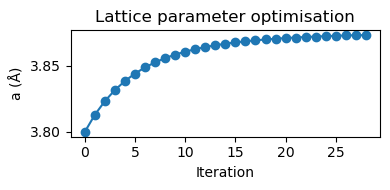

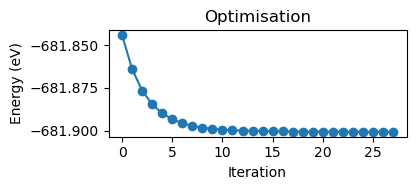

Final unit cell
	 [3.8732874, -0.0, 0.0]
	 [-0.0, 3.8732874, 0.0]
	 [0.0, 0.0, 5.4534344]
Final a = 3.8733 b = 3.8733 c = 5.4534 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-6.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-6.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-6.castep

If a train station is a place where a train stops, what's a workstation?


                                         FILE: silicon-kpoints-6.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-6.castep   

No warnings found in: silicon-kpoints-6.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-6.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


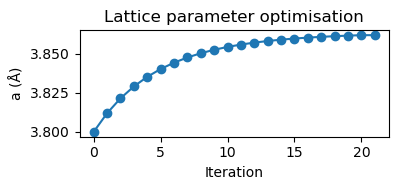

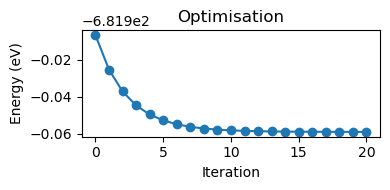

Final unit cell
	 [3.8617721, -0.0, 0.0]
	 [-0.0, 3.8617721, 0.0]
	 [0.0, 0.0, 5.4776623]
Final a = 3.8618 b = 3.8618 c = 5.4777 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-7.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-7.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-7.castep

	It is a profoundly erroneous truism, repeated by all copy-books and
by eminent people when they are making speeches, that we should cultivate
the habit of thinking about what we are doing.  The precise opposite is the
case.  Civilization advances by extending the numbers of important operations
which we can perform without thinking about them.  Operations of thought are
like cavalry charges in battle -- they are strictly limited in number, they
require fresh horses

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


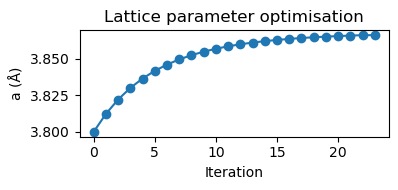

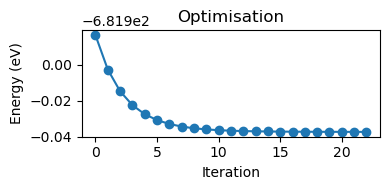

Final unit cell
	 [3.8663157, -0.0, -0.0]
	 [-0.0, 3.8663157, -0.0]
	 [-0.0, -0.0, 5.4679002]
Final a = 3.8663 b = 3.8663 c = 5.4679 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-8.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-8.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-8.castep

The important thing is not to stop questioning.


                                         FILE: silicon-kpoints-8.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-8.castep   

No warnings found in: silicon-kpoints-8.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-8.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


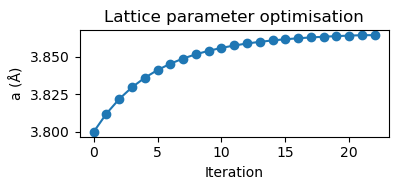

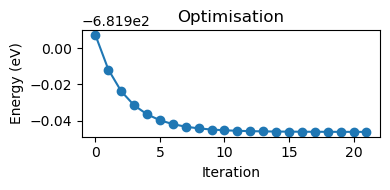

Final unit cell
	 [3.864279, 0.0, 0.0]
	 [0.0, 3.864279, -0.0]
	 [0.0, -0.0, 5.4725969]
Final a = 3.8643 b = 3.8643 c = 5.4726 alpha = 90.0000 beta = 90.0000 gamma = 90.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-9.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-9.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-kpoints-9.castep

*** NEWS FLASH ***

Archeologists find PDP-11/24 inside brain cavity of fossilized dinosaur
skeleton!  Many Digital users fear that RSX-11M may be even more primitive
than DEC admits.  Price adjustments at 11:00.

^C
Abort is in progress...hit ctrl-c again to forcibly terminate



RuntimeError: No 'LBFGS: Final Configuration:' found in file

In [10]:
params['nextra_bands'] = 6
params['cut_off_energy'] = 700

var_list = [1,2,3,4,5,6,7,8,9,10,11,12]
alist = []
energy_list = []

for var in var_list:
    kpoints_mp_grid = np.array([var, var, var])
    filename = f"silicon-kpoints-{var}"

    _ = ct.write_param_file(
        params,
        title = title,
        filename=filename,
        path=job_path,
        display_file=False
        )
    
    _ = ct.write_cell_file(
        title = title,
        path=job_path,
        filename=filename,
        na=na,
        nb=nb,
        nc=nc,
        lattice_cart=lattice_cart,
        positions_frac=positions_frac,
        constraints=constraints,
        fix_all_ions=True,
        symmetry_generate=symmetry_generate,
        symmetry_tol = symmetry_tol,
        kpoints_mp_grid=kpoints_mp_grid,
        display_file=False
    )

    castep_file = job_path / f"{filename}.castep"
    print(f"castep_file = {castep_file}")

    !zsh -l -c "castepmpi {filename}"

    castep_path = job_path / f"{filename}.castep"

    warnings = ct.get_warnings(castep_path, verbose=True)

    calculation_parameters = ct.get_calculation_parameters(castep_path)
    calculation_parameters_df = pd.DataFrame(list(calculation_parameters.items()), columns=['Parameter', 'Value'])

    lattice_optimisation = ct.get_lattice_parameters(castep_path)
    a_values = [blk['a'] for blk in lattice_optimisation]

    unit_cell, a, b, c, alpha, beta, gamma = ct.get_final_lattice_parameters(castep_path)

    energy_optimisation = ct.get_LBFGS_energies(castep_path)
    energies = [val for _, val in energy_optimisation]

    ct.print_filename(castep_path)
    print(warnings)
    display(calculation_parameters_df)

    ct.plot_sequence(a_values, xlabel='Iteration', ylabel='a (Å)', title='Lattice parameter optimisation')
    ct.plot_sequence(energies, xlabel='Iteration', ylabel='Energy (eV)', title='Optimisation')

    print(f"Final unit cell")
    for vector in unit_cell:
        print(f"\t {vector}")
    print(f"Final a = {a:.4f} b = {b:.4f} c = {c:.4f} alpha = {alpha:.4f} beta = {beta:.4f} gamma = {gamma:.4f}\n")

    alist.append(a)
    energy_list.append(energies[-1])


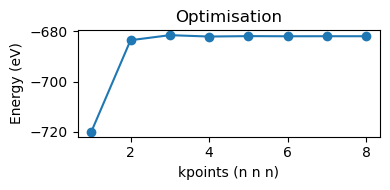

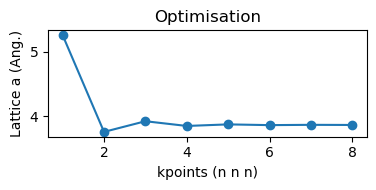

,kpoints (n n n),Lattice constant (Å),Energy
0,1,5.261706,-719.980524
1,2,3.756537,-683.523651
2,3,3.922463,-681.522361
3,4,3.848791,-682.063061
4,5,3.873287,-681.900760
5,6,3.861772,-681.959028
6,7,3.866316,-681.937326
7,8,3.864279,-681.946094


In [17]:
ct.plot_sequence(energy_list, var_list, xlabel='kpoints (n n n)', ylabel='Energy (eV)', title='Optimisation')
ct.plot_sequence(alist, var_list, xlabel='kpoints (n n n)', ylabel='Lattice a (Ang.)', title='Optimisation')

import pandas as pd

df = pd.DataFrame({
    "kpoints (n n n)": var_list,
    "Lattice constant (Å)": alist,
    "Energy": energy_list,
})

display( df)

### Final optimised parameters

In [21]:
params = {'task' : 'geomopt',
          'xc_functional'           : 'PBE',
          'cut_off_energy'          : 700,
          'spin_polarised'          : 'false',
          'write_cell_structure'    : 'true',
          'charge'                  : 0,
          'nextra_bands'            : 6,
          'geom_energy_tol'         : 0.00005,          # default: 0.00005 eV 
          'geom_disp_tol'           : 0.002,            # default: 0.002 Ang.
          'geom_max_iter'           : 100,              # default: 30
          'geom_convergence_win'    : 2,                # default: 2
          'max_scf_cycles'          : 300               # default: 30
          }              

In [22]:
# 

filename = "silicon"
title = "silicon lattice parameter optimisation"

na=1
nb=1
nc=1

lattice_cart = np.array([
            [3.8,     0.0,     0.0],
            [0.0,     3.8,     0.0],
            [0.0,     0.0,     5.4,]
        ])

positions_frac = np.array([
            ['Si', 0.0,  0.0,  0.0],
            ['Si', 0.5,  0.0,  0.25],
            ['Si', 0.5,  0.5,  0.5],
            ['Si', 0.0,  0.5,  0.75],
        ])

constraints = np.array([
            [1,  1,  2],
            [0,  0,  0]
        ])

kpoints_mp_grid = np.array([6, 6, 6])

fix_all_ions = True
symmetry_generate=False
symmetry_tol = 0.01

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-optimised.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-optimised.cell
castep_file = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-optimised.castep

Everything ends badly.  Otherwise it wouldn't end.


                                         FILE: silicon-optimised.castep                                        
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-optimised.castep   

No warnings found in: silicon-optimised.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice_001/silicon-optimised.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,16.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


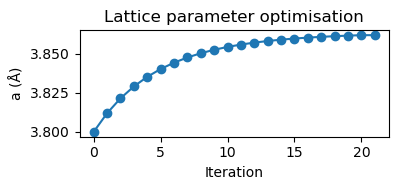

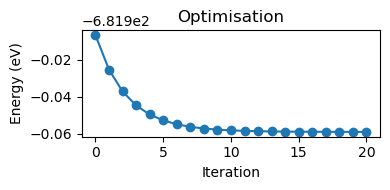

Final unit cell
	 [3.8617721, 0.0, -0.0]
	 [0.0, 3.8617721, 0.0]
	 [-0.0, 0.0, 5.4776623]
Final a = 3.8618 b = 3.8618 c = 5.4777 alpha = 90.0000 beta = 90.0000 gamma = 90.0000



In [23]:

filename = f"silicon-optimised"

_ = ct.write_param_file(
    params,
    title = title,
    filename=filename,
    path=job_path,
    display_file=False
    )

_ = ct.write_cell_file(
    title = title,
    path=job_path,
    filename=filename,
    na=na,
    nb=nb,
    nc=nc,
    lattice_cart=lattice_cart,
    positions_frac=positions_frac,
    constraints=constraints,
    fix_all_ions=True,
    symmetry_generate=symmetry_generate,
    symmetry_tol = symmetry_tol,
    kpoints_mp_grid=kpoints_mp_grid,
    display_file=False
)

castep_file = job_path / f"{filename}.castep"
print(f"castep_file = {castep_file}")

!zsh -l -c "castepmpi {filename}"

castep_path = job_path / f"{filename}.castep"

warnings = ct.get_warnings(castep_path, verbose=True)

calculation_parameters = ct.get_calculation_parameters(castep_path)
calculation_parameters_df = pd.DataFrame(list(calculation_parameters.items()), columns=['Parameter', 'Value'])

lattice_optimisation = ct.get_lattice_parameters(castep_path)
a_values = [blk['a'] for blk in lattice_optimisation]

unit_cell, a, b, c, alpha, beta, gamma = ct.get_final_lattice_parameters(castep_path)

energy_optimisation = ct.get_LBFGS_energies(castep_path)
energies = [val for _, val in energy_optimisation]

ct.print_filename(castep_path)
print(warnings)
display(calculation_parameters_df)

ct.plot_sequence(a_values, xlabel='Iteration', ylabel='a (Å)', title='Lattice parameter optimisation')
ct.plot_sequence(energies, xlabel='Iteration', ylabel='Energy (eV)', title='Optimisation')

print(f"Final unit cell")
for vector in unit_cell:
    print(f"\t {vector}")
print(f"Final a = {a:.4f} b = {b:.4f} c = {c:.4f} alpha = {alpha:.4f} beta = {beta:.4f} gamma = {gamma:.4f}\n")

alist.append(a)
energy_list.append(energies[-1])
